In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd47f5523dfd1ab68616013eb64cd6d2


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | bargal
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hualmay
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | shetpe
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | saint-prosper
Processing Record 15 of Set 1 | halalo
City not found. Skipping...
Processing Record 16 of Set 1 | ahumada
City not found. Skipping...
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | fredericksburg
Processing Rec

Processing Record 35 of Set 4 | kavieng
Processing Record 36 of Set 4 | tyup
Processing Record 37 of Set 4 | havoysund
Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | marolambo
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | mrakovo
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | requena
Processing Record 45 of Set 4 | manubul
Processing Record 46 of Set 4 | kikwit
Processing Record 47 of Set 4 | rungata
City not found. Skipping...
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | saint-augustin
Processing Record 50 of Set 4 | souillac
Processing Record 1 of Set 5 | olinda
Processing Record 2 of Set 5 | mandera
Processing Record 3 of Set 5 | kamaishi
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | mecca
Processing Record 8 of Set 5 |

Processing Record 25 of Set 8 | mayo
Processing Record 26 of Set 8 | praya
Processing Record 27 of Set 8 | krasnyy yar
Processing Record 28 of Set 8 | ylivieska
Processing Record 29 of Set 8 | dordrecht
Processing Record 30 of Set 8 | derzhavinsk
Processing Record 31 of Set 8 | redlands
Processing Record 32 of Set 8 | kibuye
Processing Record 33 of Set 8 | pangody
Processing Record 34 of Set 8 | antalaha
Processing Record 35 of Set 8 | liberal
Processing Record 36 of Set 8 | mangai
Processing Record 37 of Set 8 | mayumba
Processing Record 38 of Set 8 | belyy yar
Processing Record 39 of Set 8 | hukuntsi
Processing Record 40 of Set 8 | aksu
Processing Record 41 of Set 8 | japura
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | kanniyakumari
Processing Record 44 of Set 8 | warud
Processing Record 45 of Set 8 | sena madureira
Processing Record 46 of Set 8 | hokitika
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | camana
Processing Record 49 o

Processing Record 13 of Set 12 | beyneu
Processing Record 14 of Set 12 | marienburg
Processing Record 15 of Set 12 | vila franca do campo
Processing Record 16 of Set 12 | arauca
Processing Record 17 of Set 12 | fort smith
Processing Record 18 of Set 12 | oktyabrskoye
Processing Record 19 of Set 12 | fairbanks
Processing Record 20 of Set 12 | lufkin
Processing Record 21 of Set 12 | kingman
Processing Record 22 of Set 12 | vung tau
Processing Record 23 of Set 12 | sayan
Processing Record 24 of Set 12 | okitipupa
Processing Record 25 of Set 12 | amalapuram
Processing Record 26 of Set 12 | ust-tarka
Processing Record 27 of Set 12 | basco
Processing Record 28 of Set 12 | galveston
Processing Record 29 of Set 12 | bachaquero
Processing Record 30 of Set 12 | tazovskiy
Processing Record 31 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 32 of Set 12 | scarborough
Processing Record 33 of Set 12 | dalmatovo
Processing Record 34 of Set 12 | nhulunbuy
Processing Record 35 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,71.10,67,0,5.41,AU,2022-02-04 16:56:33
1,Luderitz,-26.6481,15.1594,74.93,60,6,17.11,NA,2022-02-04 16:56:34
2,New Norfolk,-42.7826,147.0587,57.92,74,85,2.06,AU,2022-02-04 16:56:34
3,Hualmay,-11.0964,-77.6139,75.56,72,38,11.39,PE,2022-02-04 16:56:35
4,Bluff,-46.6000,168.3333,49.80,65,61,9.86,NZ,2022-02-04 16:56:35
5,Shetpe,44.1667,52.1167,41.07,90,100,4.32,KZ,2022-02-04 16:56:35
6,Hobart,-42.8794,147.3294,58.26,86,100,5.75,AU,2022-02-04 16:55:11
7,Cape Town,-33.9258,18.4232,76.12,50,0,5.99,ZA,2022-02-04 16:56:35
8,Punta Arenas,-53.1500,-70.9167,50.11,50,0,11.50,CL,2022-02-04 16:52:17
9,Jamestown,42.0970,-79.2353,21.02,62,100,4.00,US,2022-02-04 16:56:36


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

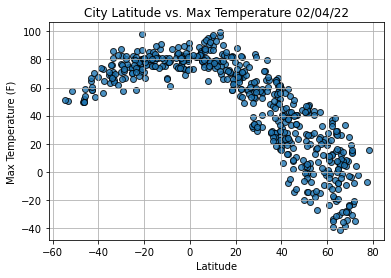

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

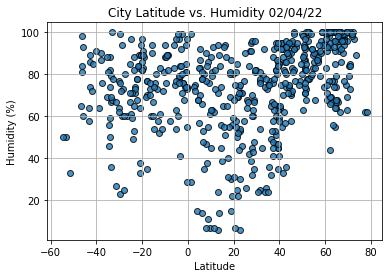

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

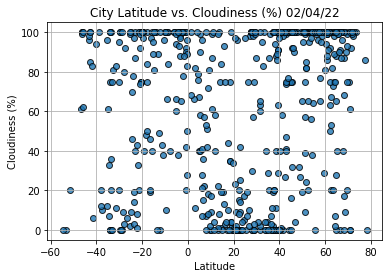

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

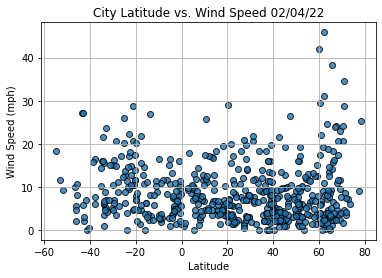

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

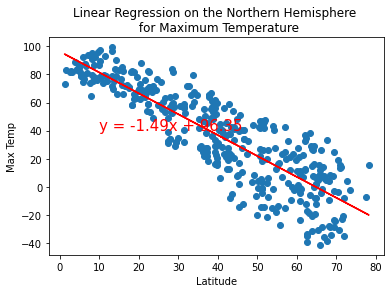

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

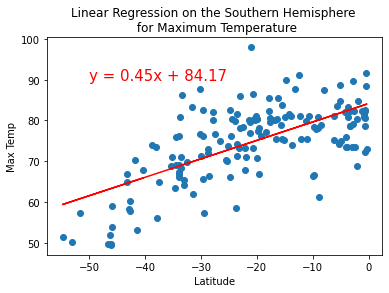

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

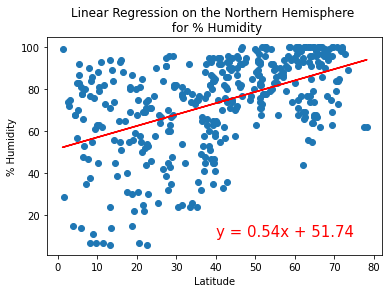

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

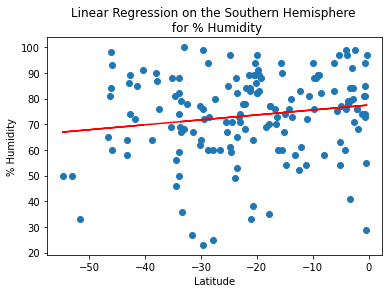

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

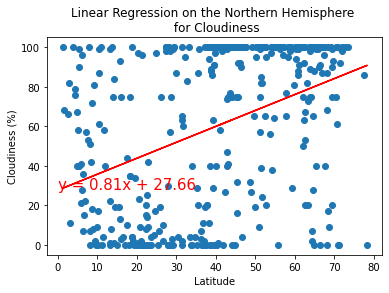

<Figure size 432x288 with 0 Axes>

In [34]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

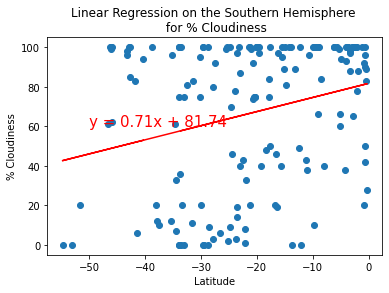

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

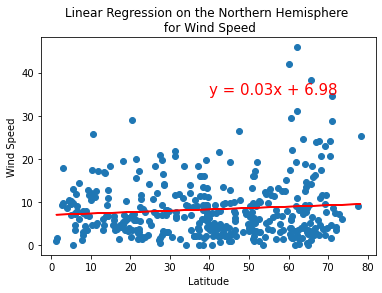

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

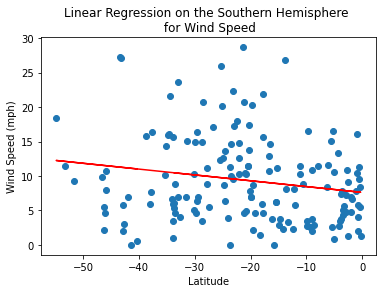

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-50,35))